<ul>
    <li><b>Clustering</b> is a machine learning technique that uses unsupervised learning.</li>
    <li> Group unlabelled data into natural clusters </li>
    <li> Clustering is an optimization problem </li>
    <li> $variability(c) = \sum_{e \in c} distance(mean(c), e)^2$</li>
    <li> Variance is different from variability, you don't divide by n. This is because in clustering big and bad is worse than small and bad. </li>
    <li>$dissimilarity(C) = \sum_{c \in C}variability(c)$</li>
    <li> Find a C that minimises dissimilarity</li>
    <li> In order for this not to end up as each point being a cluster we add a constraint e.g. the clusters have to have some minimum distance between them or constrain the number of clusters</li>
    </ul>

<ul>
    <li><b>Hierarchical Clustering </b></li>
    <li> Start by assigning each item to a cluster so that if you have N items you now have N clusters, each containing just one item</li>
    <li>Find the closest (most similar) pair of clusters and merge them into a single cluster, so that now you have one fewer clusters</li>
    <li>Continue until all items are clustered into a single cluster of size N</li>
    <li> Agglomerative hierarchical clustering </li>
    <li> What do we mean by closest?</li>
    <li> Can get different clusters depending linkage metric we use </li>
    <li> <b>Single Linkage:</b> consider the distance between one clsuter and another cluster to be equal to the shortest distance from any member of one cluster to any member of another cluster</li>
    <li><b>Complete linkage</b>: consider the distance between one cluster and another cluster to be equal to the greatest distance from any member of one cluster to any member of the other cluster</li>
    <li><b>Average linkage</b>: consider the distance between one cluster and another cluster to be te average distance from any member of one cluster to any member of the other cluster</li>
    <ul>
    

<table style="width:50%">
<tr>
    <th>BOS</th>    
    <th>NY</th>
    <th>CHI</th>
    <th>DEN</th>
    <th>SF</th>
    <th>SEA</th>
</tr>
<tr>
    <th>0</th>    
    <th>206</th>
    <th>963</th>
    <th>1949</th>
    <th>3095</th>
    <th>2979</th>
</tr>
    <tr>
    <th>0</th>    
    <th>0</th>
    <th>802</th>
    <th>1771</th>
    <th>2934</th>
    <th>2815</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>966</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>1235</th>
    <th>1307</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>808</th>
</tr>
<tr>
    <th>0</th>    
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
    <th>0</th>
</tr>

</table>

Cluster airports based on their distance.

<b> Airport clusters </b>
<ul>
    <li> [BOS, NY], [CHI], [DEN], [SF], [SEA]</li>
    <li> [BOS, NY, CHI], [DEN], [SF], [SEA]</li>
    <li> [BOS, NY, CHI], [DEN], [SF,SEA]</li>
    <li> <b>Single</b>[BOS, NY, CHI, DEN], [SF,SEA]</li>
    <li> <b>Complete</b>[BOS, NY, CHI], [DEN, SF,SEA]</li>
</ul>

<ul>
    <li>Get history of dendrograms</li>
    <li>Deterministic given a linkage metric</li>
    <li> Answer might not be option. The algorithm is greedy. Making locally optimial decisions at each point may not lead to a globally optimal solution</li>
    <li> Flexible</li>
    <li> Really slow complexity $O(n^3)$ basically useless for large datasets. </li>
</ul>

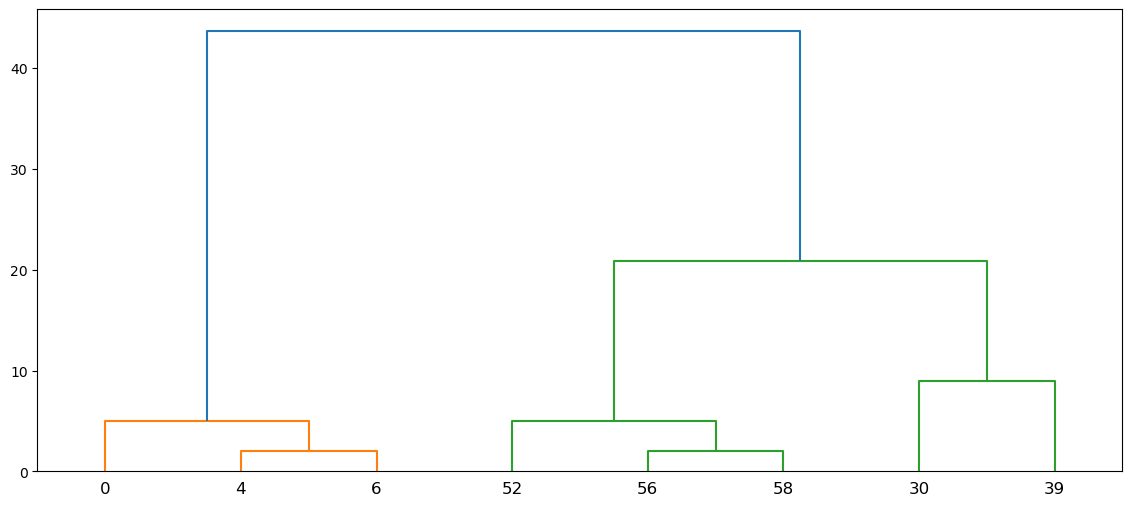

In [29]:
import numpy as np
import scipy.cluster.hierarchy as sch
data = [0, 4, 6, 30, 39, 52, 56, 58]
data_np = np.reshape(data, (len(data), 1))
dendrogram = sch.dendrogram(sch.linkage(data_np, method='average'), labels=data)

In [30]:
airport = ["BOS", "NY", "CHI", "DEN", "SF", "SEA"]
distance = [[0, 206, 963, 1949, 3095, 2979]
            ,[206, 0, 802, 1771, 2934, 2815]
            ,[963, 802, 0, 966, 2142, 2013]
            ,[1949, 1771, 966, 0, 1235, 1307]
            ,[3095, 2934, 2142, 1235, 0, 808]
            ,[2979, 2815, 2013, 1307, 808, 0]]

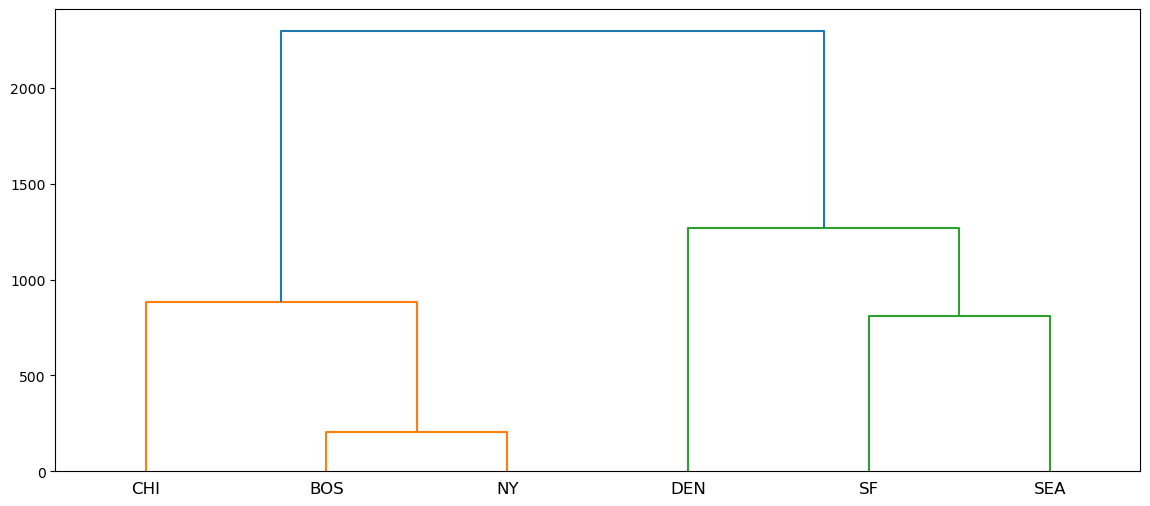

In [31]:
from scipy.spatial.distance import squareform
condensed_distance = squareform(distance)
dendrogram = sch.dendrogram(sch.linkage(condensed_distance, method='average'), labels=airport)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [33]:
dataset = make_blobs(n_samples=50, n_features=2, centers=4, cluster_std=1.6, random_state=50)

In [34]:
points = dataset[0]
points

array([[-0.48428125,  6.1339592 ],
       [ 0.11528327, -4.98158692],
       [ 0.09417313, -4.05882797],
       [-7.556685  , -2.42379349],
       [ 0.59860361,  3.34704241],
       [-4.73695683, -1.23390307],
       [-1.88583355, -0.65794471],
       [-1.25918778,  8.42166447],
       [-5.46469501, -1.4677575 ],
       [-5.21118763, -0.88454091],
       [-2.39128542,  9.5902579 ],
       [-3.79577694, -3.94197151],
       [-0.55798628, -2.70088621],
       [-2.84694071, 11.70447814],
       [-5.88958899, -1.47219541],
       [-0.4497762 ,  4.58102297],
       [-6.15966811, -2.13553844],
       [-0.10009538,  8.99929345],
       [-2.15963524, -7.56230415],
       [-3.51874239, -4.48330466],
       [-1.32101631, 10.72186833],
       [ 5.19455346, -3.85790517],
       [ 1.00681205, -5.97364221],
       [-1.16539558,  7.39086886],
       [-3.25968528,  5.44630828],
       [-5.39405829,  0.12384806],
       [-3.87922543,  9.49845046],
       [-2.31431452,  9.98631399],
       [-1.92013725,

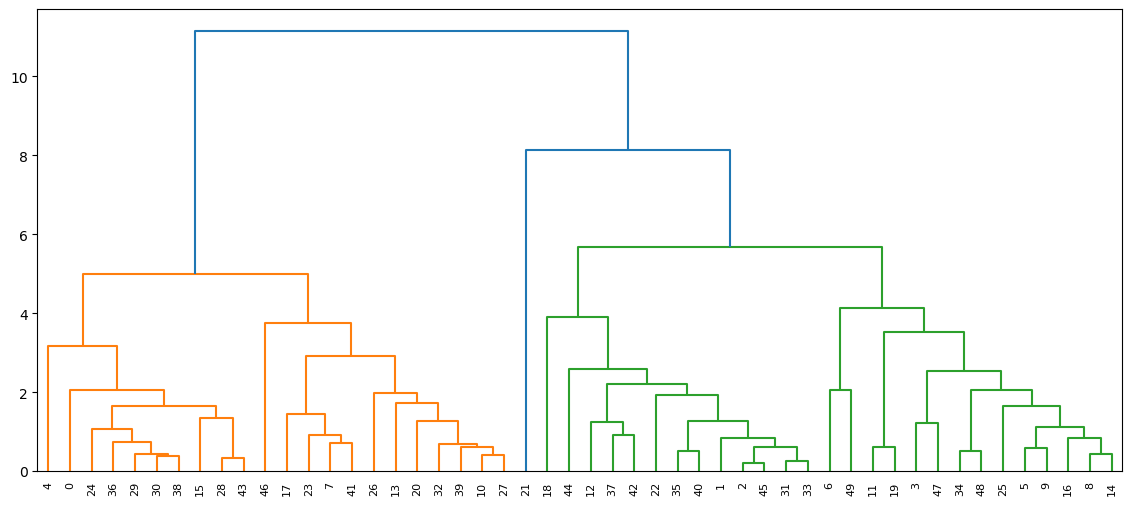

In [35]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(points, method='average'))

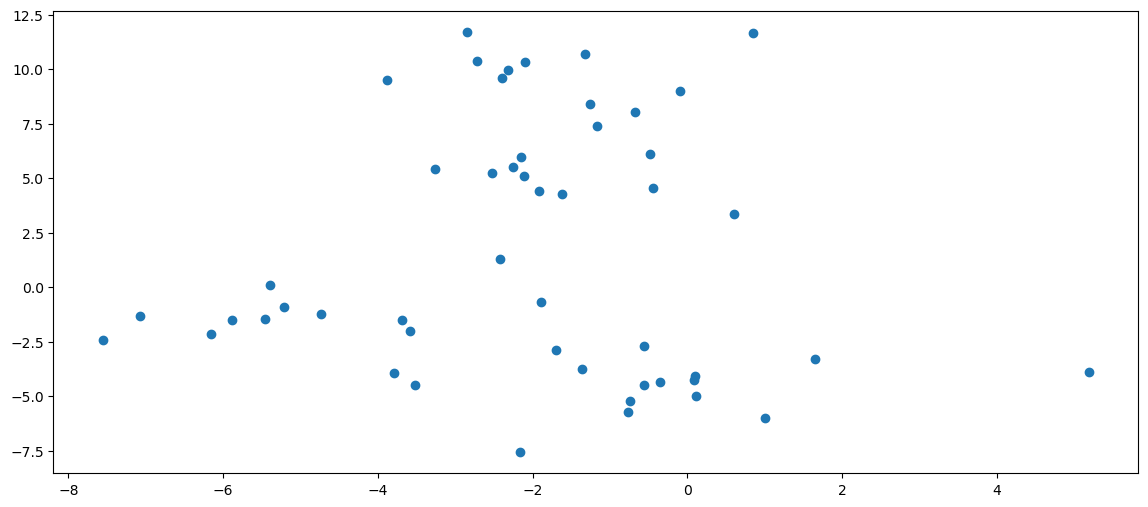

In [36]:
plt.scatter(dataset[0][:,0], dataset[0][:,1])

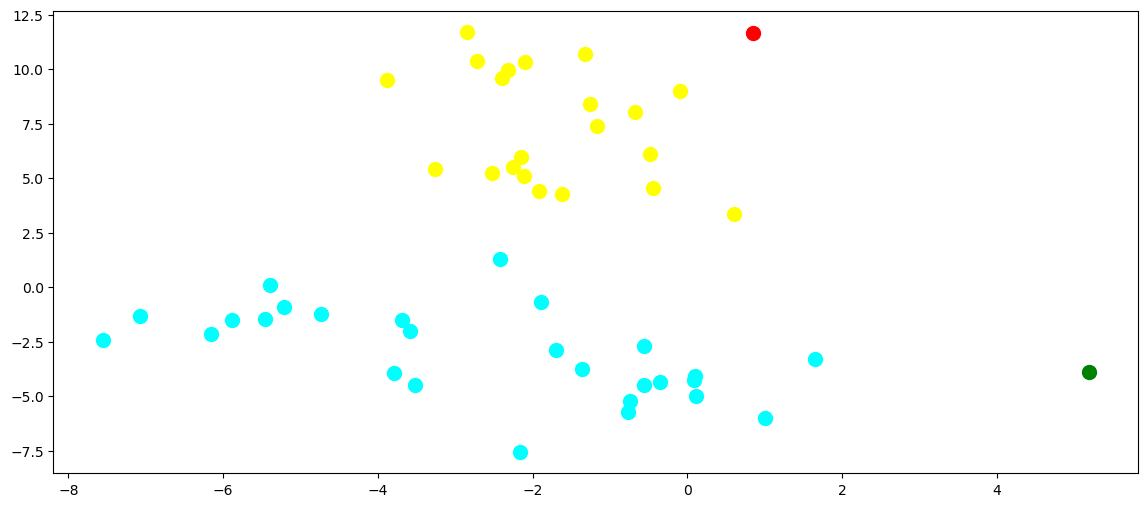

In [37]:
hc = AgglomerativeClustering(n_clusters=4, linkage="single", metric="euclidean")
y_hc = hc.fit_predict(points)
plt.scatter(points[y_hc==0,0], points[y_hc==0,1], s=100, c='cyan')
plt.scatter(points[y_hc==1,0], points[y_hc==1,1], s=100, c='yellow')
plt.scatter(points[y_hc==2,0], points[y_hc==2,1], s=100, c='red')
plt.scatter(points[y_hc==3,0], points[y_hc==3,1], s=100, c='green')

In [38]:
import pandas as pd
loan_data = pd.read_csv("loan_data3.csv")
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [39]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [40]:
percent_missing = round(100*(loan_data.isnull().sum())/len(loan_data), 2)

In [41]:
percent_missing

credit_policy        0.0
purpose              0.0
int_rate             0.0
installment          0.0
log_annual_inc       0.0
dti                  0.0
fico                 0.0
days_with_cr_line    0.0
revol_bal            0.0
revol_util           0.0
inq_last_6mths       0.0
delinq_2yrs          0.0
pub_rec              0.0
not_fully_paid       0.0
dtype: float64

In [42]:
cleaned_data = loan_data.drop(['purpose', 'not_fully_paid'], axis=1)

In [43]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   int_rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log_annual_inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days_with_cr_line  9578 non-null   float64
 7   revol_bal          9578 non-null   int64  
 8   revol_util         9578 non-null   float64
 9   inq_last_6mths     9578 non-null   int64  
 10  delinq_2yrs        9578 non-null   int64  
 11  pub_rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


In [44]:
import seaborn as sb
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14, 6]
    sb.boxplot(data=df, orient='v')
    plt.title("Outlier Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight="bold")
    plt.xlabel("Attributes", fontweight="bold")

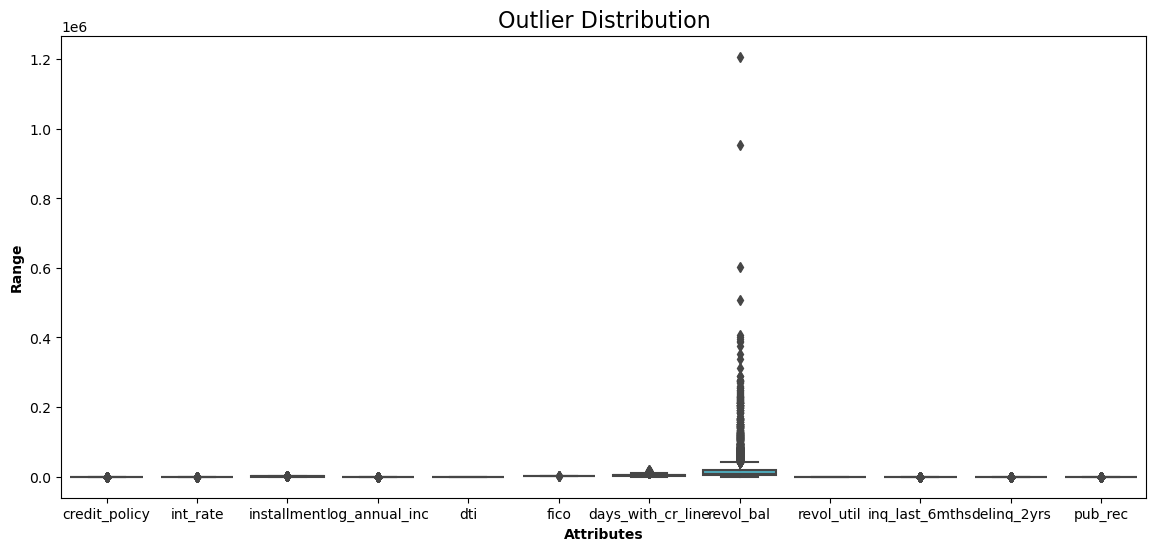

In [45]:
show_boxplot(cleaned_data)

In [46]:
def remove_outliers(data):
    df = data.copy()
    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.25)
        Q3 = df[str(col)].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
        return df

In [47]:
without_outliers = remove_outliers(cleaned_data)
without_outliers.shape
#pruned_data = without_outliers[0:5000]

(7710, 12)

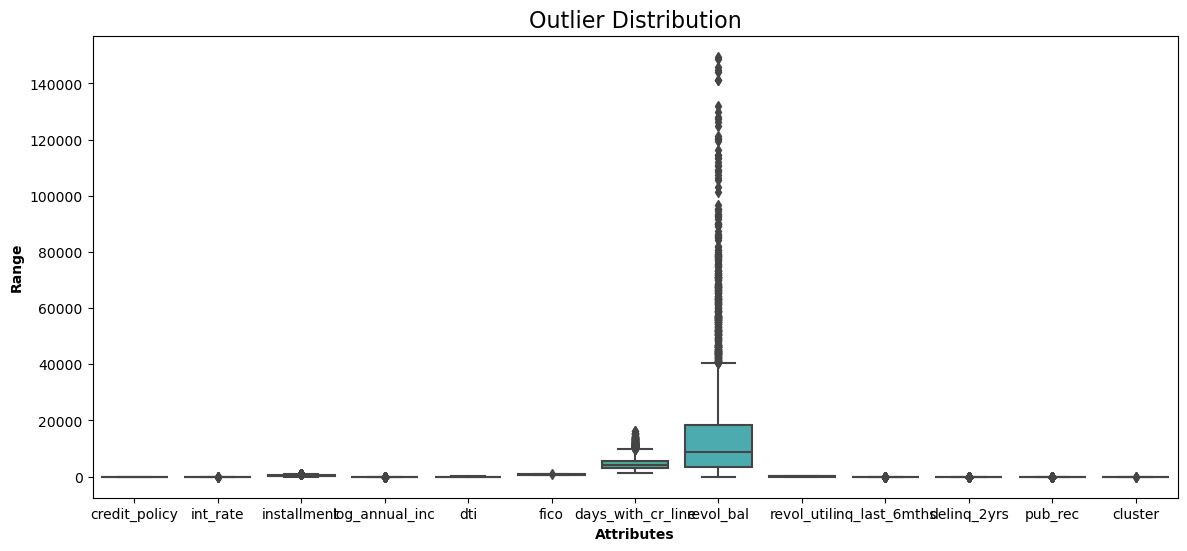

In [48]:
show_boxplot(pruned_data)

In [49]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.005711,2.451486,0.696572,1.083636,0.536305,0.394065,0.892053,0.235508,-0.865537,-0.305309,-0.228277
1,0.0,-0.455786,-0.471109,0.238262,0.300483,-0.282733,-0.791213,1.174619,1.089086,-0.865537,-0.305309,-0.228277
2,0.0,0.662759,0.203216,-0.972419,-0.100902,-0.965265,0.011331,-0.609535,-0.683996,0.002138,-0.305309,-0.228277
3,0.0,-0.702179,-0.791540,0.696572,-0.633567,-0.146226,-0.815923,1.177226,0.967642,0.002138,-0.305309,-0.228277
4,0.0,0.932618,-1.080551,0.609999,0.403093,-1.374784,-0.253714,-0.536716,-0.201690,-0.865537,1.826876,-0.228277


In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [51]:
complete_clustering = linkage(scaled_data, method='complete', metric='euclidean')
average_clustering = linkage(scaled_data, method='average', metric='euclidean')
single_clustering = linkage(scaled_data, method='single', metric='euclidean')

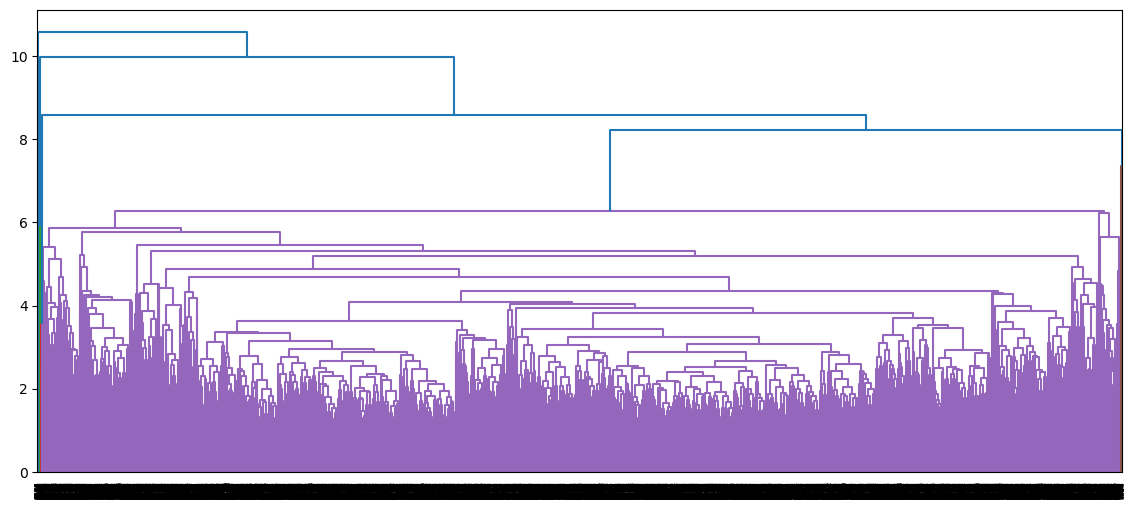

In [52]:
dendrogram(average_clustering)
plt.show()

In [53]:
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1,)

In [54]:
without_outliers['cluster'] = cluster_labels

<Axes: xlabel='cluster', ylabel='fico'>

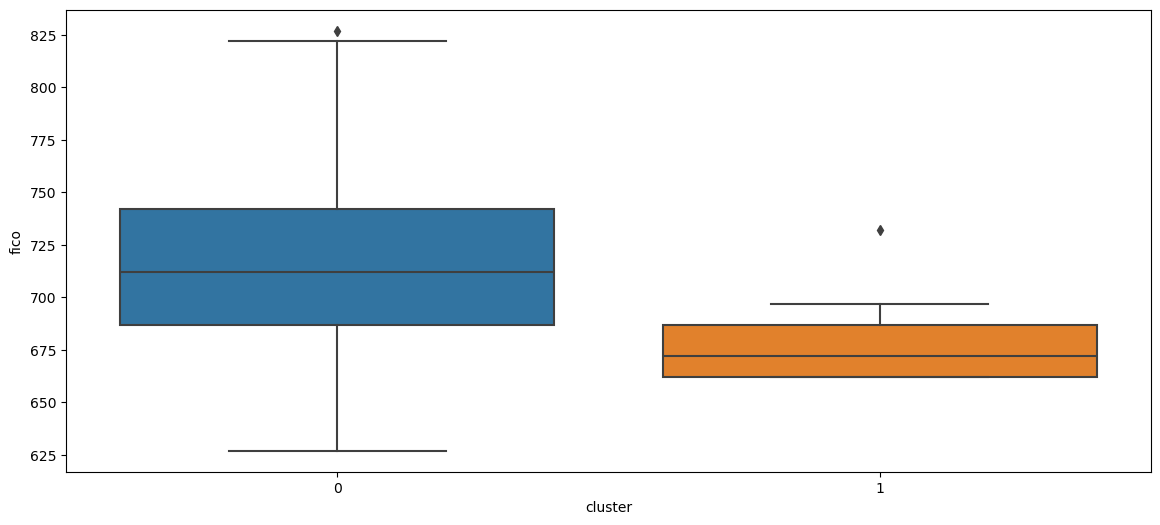

In [55]:
sb.boxplot(x="cluster", y='fico', data=without_outliers)

<b> k-means </b>
<ul> 
    <li> k is the number of clusters that you want</li>
    <li> If you don't have any idea about the number of clusters that you want it is problematic</li>
    <li> If you know k then k-means is a good choice because it is much faster</li>
</ul>


<b> k-means algorithm </b>
<ul>
    <li> randomly choose k examples as initial centroids</li>
    <li> while true:</li>
    <li> create k clusters by assigning each example to the nearest centroid</li>
    <li> compute k new centroids by averaging examples in each cluster</li>
    <li> if centroid doesn't change stop</li>
</ul>


<b> Complexity of k-means </b>
<ul>
    <li>Compare each point to each centroid k*n</li>
    <li>Typically converges quite quickly</li>
    <li>Most commonly used clustering algorithm because it is very fast</li>
</ul>

<b> Choosing k </b>
<ul>
    <li> Choosing the wrong k can be problematic</li>
    <li> If k is non-sensical your clustering will be too</li>
    <li> Results can depend on the initial centroids</li>
    <li> k-means is non-deterministic</li>
    <li> If initial centroids are poorly chosen can take longer to converge or get a different answer all together</li>
</ul>

<b>Choosing k</b>
<ul>
    <li> Choose k using a priori knowledge about the application</li>
    <li> For example only 5 different types of bacteria in the world</li>
    <li> There are two types of people in the world - DkIT graduates and the rest</li>
    <li> Try different values for k and see what works best</li>
    <li> Run hierarchical clustering on a subset of the data</li>
    <li> Try and select good initial centroids distributed over the space</li>
    <li> Try multiple sets of random starting centroids and select the best results</li>
</ul>

<b>Mitigating dependence on initial centroids</b>
<ul>
    <li>best = kmeans(points)</li>
    <li>for t in range(numTrials):</li>
    <li> C = kmeans(points)</li>
    <li> if dissimilarity(C) < dissimilarity(best):</li>
    <li> best = C</li>
    <li> return C</li>
</ul>

In [56]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [57]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohen,29,61000
3,Ismail,28,60000
4,Kory,42,150000


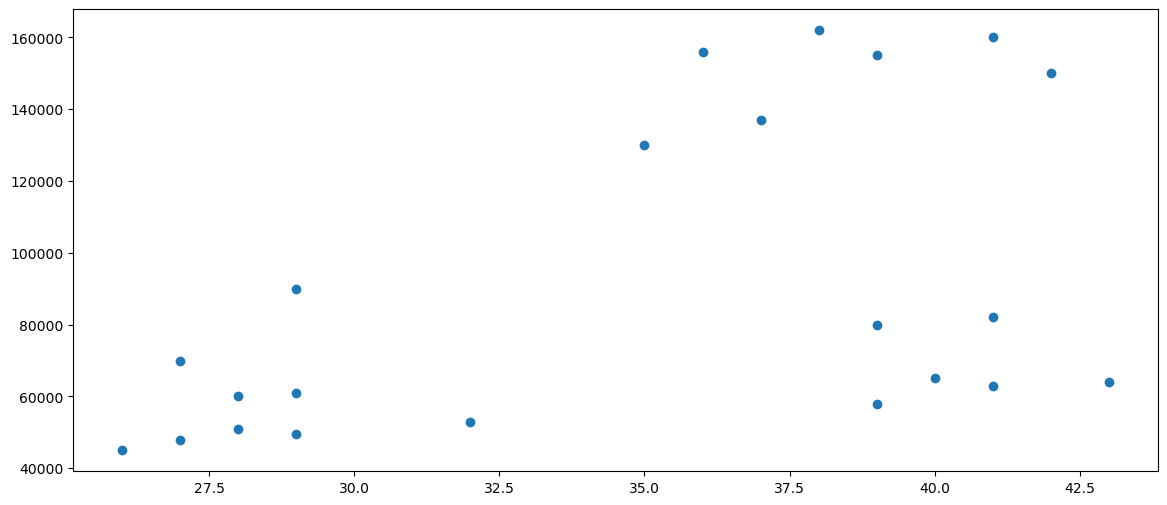

In [58]:
plt.scatter(df['Age'], df['Income'])

In [61]:
km = KMeans(n_clusters=3, n_init='auto')
km

KMeans(n_clusters=3, n_init='auto')

In [62]:
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohen,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


Text(0, 0.5, 'Income')

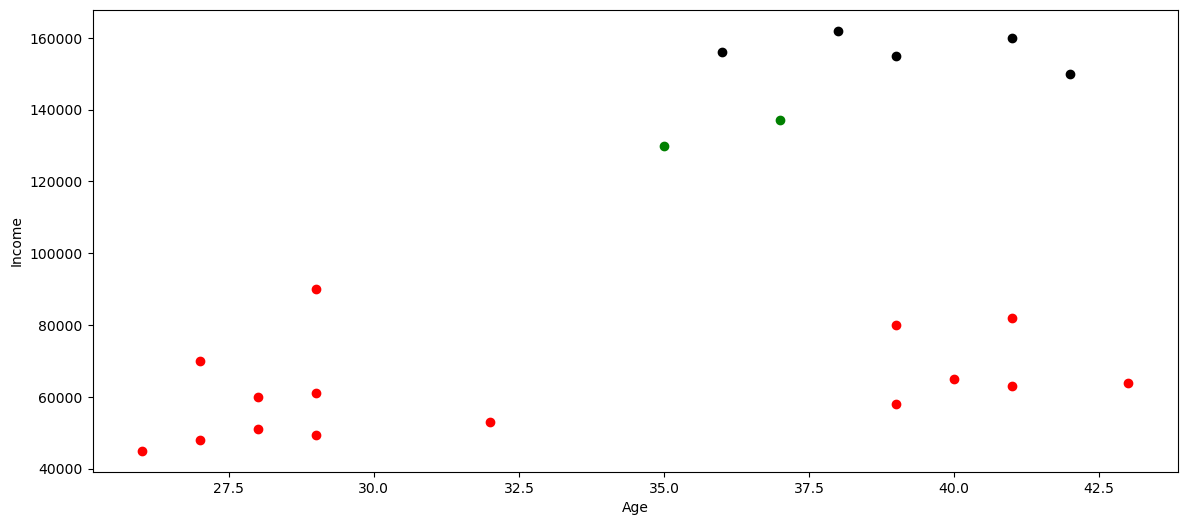

In [66]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.Age, df0.Income, color='green')
plt.scatter(df1.Age, df1.Income, color='red')
plt.scatter(df2.Age, df2.Income, color='black')
plt.xlabel('Age')
plt.ylabel('Income')

Problematic as the features are not scaled. Income, which is 1000 greater than age is the only thing that matters so this clusters differently to what we might expect.

In [71]:
scaler = MinMaxScaler()
scaler.fit(df['Income'].values.reshape(-1, 1))
df['Income'] = scaler.transform(df['Income'].values.reshape(-1, 1))

In [72]:
df.head()

,Name,Age,Income,cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohen,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,2
